# Homework 4

In [7]:
import pandas as pd
import sqlite3 as sql
import matplotlib.pyplot as plt
import re

## Joining Data

We want to analyse the number of cellphones per capita and to do so we need data on population sizes for countries in the years 1960-2020. This data can be loaded in through a csv-file named pop_data.csv.

In [10]:
pop_df = pd.read_csv('pop_data.csv')
pop_df

,Unnamed: 0,iso-3,1960,1961,1962,1963,1964,1965,1966,1967,...,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
0,0,ABW,54608.0,55811.0,56682.0,57475.0,58178.0,58782.0,59291.0,59522.0,...,101288.0,102112.0,102880.0,103594.0,104257.0,104874.0,105439.0,105962.0,106442.0,106585.0
1,1,AFE,130692579.0,134169237.0,137835590.0,141630546.0,145605995.0,149742351.0,153955516.0,158313235.0,...,537792950.0,552530654.0,567892149.0,583651101.0,600008424.0,616377605.0,632746570.0,649757148.0,667242986.0,685112979.0
2,2,AFG,8622466.0,8790140.0,8969047.0,9157465.0,9355514.0,9565147.0,9783147.0,10010030.0,...,29249157.0,30466479.0,31541209.0,32716210.0,33753499.0,34636207.0,35643418.0,36686784.0,37769499.0,38972230.0
3,3,AFW,97256290.0,99314028.0,101445032.0,103667517.0,105959979.0,108336203.0,110798486.0,113319950.0,...,366489204.0,376797999.0,387204553.0,397855507.0,408690375.0,419778384.0,431138704.0,442646825.0,454306063.0,466189102.0
4,4,AGO,5357195.0,5441333.0,5521400.0,5599827.0,5673199.0,5736582.0,5787044.0,5827503.0,...,24259111.0,25188292.0,26147002.0,27128337.0,28127721.0,29154746.0,30208628.0,31273533.0,32353588.0,33428486.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
261,261,XKX,947000.0,966000.0,994000.0,1022000.0,1050000.0,1078000.0,1106000.0,1135000.0,...,1791000.0,1807106.0,1818117.0,1812771.0,1788196.0,1777557.0,1791003.0,1797085.0,1788878.0,1790133.0
262,262,YEM,5542459.0,5646668.0,5753386.0,5860197.0,5973803.0,6097298.0,6228430.0,6368014.0,...,25475610.0,26223391.0,26984002.0,27753304.0,28516545.0,29274002.0,30034389.0,30790513.0,31546691.0,32284046.0
263,263,ZAF,16520441.0,16989464.0,17503133.0,18042215.0,18603097.0,19187194.0,19789771.0,20410677.0,...,52443325.0,53145033.0,53873616.0,54729551.0,55876504.0,56422274.0,56641209.0,57339635.0,58087055.0,58801927.0
264,264,ZMB,3119430.0,3219451.0,3323427.0,3431381.0,3542764.0,3658024.0,3777680.0,3901288.0,...,14265814.0,14744658.0,15234976.0,15737793.0,16248230.0,16767761.0,17298054.0,17835893.0,18380477.0,18927715.0


We can look at which rows contain NaN so we know where to fill in values.

In [12]:
pop_nan_rows = pop_df[pop_df.isna().any(axis=1)]
pop_nan_rows

,Unnamed: 0,iso-3,1960,1961,1962,1963,1964,1965,1966,1967,...,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
110,110,INX,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
196,196,PSE,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,3882986.0,3979998.0,4076708.0,4173398.0,4270092.0,4367088.0,4454805.0,4569087.0,4685306.0,4803269.0


We can check if the row with index 110 only contains NaN values.

In [14]:
pd.isnull(pop_nan_rows.loc[110]).all()

False

Since the row with index 110 only contains NaN values we can not use forward- or backward fill directly. Instead we can fill the row succesively with the average values for each of the columns.

In [16]:
for year in range(1960, 2021):
    mean_year = pop_df[str(year)].mean()
    pop_df.loc[110, str(year)] = mean_year

pop_df.loc[110]

Unnamed: 0                 110
iso-3                      INX
1960          117271174.712121
1961          118880721.420455
1962          121051087.992424
                    ...       
2016          304405110.230189
2017          308257495.324528
2018          312027628.377358
2019          315711047.777358
2020          319293645.637736
Name: 110, Length: 63, dtype: object

For the row with index 196 we can use backward fill since we have values in the later parts of the row.

In [18]:
pop_filled_df = pop_df.bfill(axis=1)
pop_filled_df.loc[196]

Unnamed: 0          196
iso-3               PSE
1960          1978248.0
1961          1978248.0
1962          1978248.0
                ...    
2016          4367088.0
2017          4454805.0
2018          4569087.0
2019          4685306.0
2020          4803269.0
Name: 196, Length: 63, dtype: object

To join the previous cleaned cellphone data to our now filled population data we start by reading in the csv-file with the cellphone data.

In [20]:
df_cellphones = pd.read_csv('../HW3/cellphones.csv')
df_cellphones

,Unnamed: 0,iso-3,1960,1965,1966,1967,1968,1969,1970,1971,...,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
0,0,ABW,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,132000.0,132000.0,135000.0,139000.0,140000.0,141000.0,141000.0,141000.0,141000.0,141000.0
1,1,AFG,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,10200000.0,13800000.0,15300000.0,16800000.0,18400000.0,19700000.0,21600000.0,23900000.0,22000000.0,22600000.0
2,2,AGO,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,9400000.0,12100000.0,12800000.0,13300000.0,14100000.0,13900000.0,13000000.0,13300000.0,13300000.0,14800000.0
3,3,ALB,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,2690000.0,3100000.0,3500000.0,3690000.0,3360000.0,3400000.0,3370000.0,3630000.0,2710000.0,2630000.0
4,4,AND,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,65500.0,65000.0,63900.0,63900.0,66200.0,71300.0,76100.0,80300.0,82600.0,87900.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
209,209,XKX,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,562000.0,562000.0,562000.0,562000.0,562000.0,562000.0,562000.0,562000.0,562000.0,562000.0
210,210,YEM,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,11100000.0,11700000.0,13900000.0,16800000.0,17100000.0,15000000.0,16400000.0,15400000.0,15300000.0,15300000.0
211,211,ZAF,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,50400000.0,64000000.0,68400000.0,76900000.0,79300000.0,88000000.0,82400000.0,88500000.0,92400000.0,97000000.0
212,212,ZMB,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,5450000.0,8160000.0,10500000.0,10400000.0,10100000.0,11600000.0,12000000.0,13400000.0,15500000.0,17200000.0


Since the cellphone dataframe has all rows and columns of the population dataframe but not the other way around we can do a left join on the cellphone dataframe. In this case we only want the top 5 countries alphabetically from the cellphones data and we want to combine it in a dataframe with columns for number of cellphones and size of population in the year 1960.

In [22]:
df_cellphones_first_5_countries_1960 = df_cellphones[['iso-3', '1960']].set_index('iso-3').head()
df_cellphones_first_5_countries_1960.rename(columns={'1960': 'n_cellphones_year_1960'}, inplace = True)
df_cellphones_first_5_countries_1960

,n_cellphones_year_1960
iso-3,
ABW,0.0
AFG,0.0
AGO,0.0
ALB,0.0
AND,0.0


In [23]:
pop_filled_1960_df = pop_filled_df[['iso-3', '1960']].set_index('iso-3')
pop_filled_1960_df.rename(columns={'1960': 'population'}, inplace = True)
pop_filled_1960_df

,population
iso-3,
ABW,54608.0
AFE,130692579.0
AFG,8622466.0
AFW,97256290.0
AGO,5357195.0
...,...
XKX,947000.0
YEM,5542459.0
ZAF,16520441.0


In [24]:
df_cellphones_first_5_countries_1960.merge(pop_filled_1960_df, on='iso-3', how='left')

,n_cellphones_year_1960,population
iso-3,,
ABW,0.0,54608.0
AFG,0.0,8622466.0
AGO,0.0,5357195.0
ALB,0.0,1608800.0
AND,0.0,9443.0


Now we want to sort the 5 countries with the most cellphones per capita in the year 2019 but using the full names of the countries. To do this we need to load in a csv-file containing the country names among other things.

In [26]:
country_df = pd.read_csv('country_data.csv')
country_df.rename(columns={'alpha-3': 'iso-3'}, inplace=True)

We start by joining all three tables using left join on cellphones since this is the limiting dataframe.

In [28]:
df_cellp_pop_countr_merge = df_cellphones \
    .merge(pop_filled_df, on='iso-3', how='left') \
    .merge(country_df, on='iso-3', how='left')

In [29]:
pd.set_option('display.max_columns', 200)

We then create columns with cellphones per capita for all eligible years.

In [31]:
df_cellp_pop_countr_merge['cellphones/capita year 1960'] = \
    df_cellp_pop_countr_merge['1960_x'] / df_cellp_pop_countr_merge['1960_y']

for year in range(1965, 2020):
    df_cellp_pop_countr_merge['cellphones/capita year ' + str(year)] = \
    df_cellp_pop_countr_merge[str(year) + '_x'] / df_cellp_pop_countr_merge[str(year) + '_y']
    
df_cellp_pop_countr_merge.head()

,Unnamed: 0_x,iso-3,1960_x,1965_x,1966_x,1967_x,1968_x,1969_x,1970_x,1971_x,1972_x,1973_x,1974_x,1975_x,1976_x,1977_x,1978_x,1979_x,1980_x,1981_x,1982_x,1983_x,1984_x,1985_x,1986_x,1987_x,1988_x,1989_x,1990_x,1991_x,1992_x,1993_x,1994_x,1995_x,1996_x,1997_x,1998_x,1999_x,2000_x,2001_x,2002_x,2003_x,2004_x,2005_x,2006_x,2007_x,2008_x,2009_x,2010_x,2011_x,2012_x,2013_x,2014_x,2015_x,2016_x,2017_x,2018_x,2019_x,Unnamed: 0_y,1960_y,1961,1962,1963,1964,1965_y,1966_y,1967_y,1968_y,1969_y,1970_y,1971_y,1972_y,1973_y,1974_y,1975_y,1976_y,1977_y,1978_y,1979_y,1980_y,1981_y,1982_y,1983_y,1984_y,1985_y,1986_y,1987_y,1988_y,1989_y,1990_y,1991_y,1992_y,1993_y,1994_y,1995_y,1996_y,1997_y,1998_y,1999_y,2000_y,2001_y,2002_y,2003_y,2004_y,2005_y,2006_y,2007_y,2008_y,2009_y,2010_y,2011_y,2012_y,2013_y,2014_y,2015_y,2016_y,2017_y,2018_y,2019_y,2020,name,alpha-2,country-code,iso_3166-2,region,sub-region,intermediate-region,region-code,sub-region-code,intermediate-region-code,cellphones/capita year 1960,cellphones/capita year 1965,cellphones/capita year 1966,cellphones/capita year 1967,cellphones/capita year 1968,cellphones/capita year 1969,cellphones/capita year 1970,cellphones/capita year 1971,cellphones/capita year 1972,cellphones/capita year 1973,cellphones/capita year 1974,cellphones/capita year 1975,cellphones/capita year 1976,cellphones/capita year 1977,cellphones/capita year 1978,cellphones/capita year 1979,cellphones/capita year 1980,cellphones/capita year 1981,cellphones/capita year 1982,cellphones/capita year 1983,cellphones/capita year 1984,cellphones/capita year 1985,cellphones/capita year 1986,cellphones/capita year 1987,cellphones/capita year 1988,cellphones/capita year 1989,cellphones/capita year 1990,cellphones/capita year 1991,cellphones/capita year 1992,cellphones/capita year 1993,cellphones/capita year 1994,cellphones/capita year 1995,cellphones/capita year 1996,cellphones/capita year 1997,cellphones/capita year 1998,cellphones/capita year 1999,cellphones/capita year 2000,cellphones/capita year 2001,cellphones/capita year 2002,cellphones/capita year 2003,cellphones/capita year 2004,cellphones/capita year 2005,cellphones/capita year 2006,cellphones/capita year 2007,cellphones/capita year 2008,cellphones/capita year 2009,cellphones/capita year 2010,cellphones/capita year 2011,cellphones/capita year 2012,cellphones/capita year 2013,cellphones/capita year 2014,cellphones/capita year 2015,cellphones/capita year 2016,cellphones/capita year 2017,cellphones/capita year 2018,cellphones/capita year 2019
0,0,ABW,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,20.0,20.0,20.0,1720.0,3000.0,3400.0,5380.0,12000.0,15000.0,53000.0,61800.0,70000.0,98400.0,103000.0,109000.0,114000.0,121000.0,128000.0,132000.0,132000.0,135000.0,139000.0,140000.0,141000.0,141000.0,141000.0,141000.0,141000.0,0,54608.0,55811.0,56682.0,57475.0,58178.0,58782.0,59291.0,59522.0,59471.0,59330.0,59106.0,58816.0,58855.0,59365.0,60028.0,60715.0,61193.0,61465.0,61738.0,62006.0,62267.0,62614.0,63116.0,63683.0,64174.0,64478.0,64553.0,64450.0,64332.0,64596.0,65712.0,67864.0,70192.0,72360.0,74710.0,77050.0,79417.0,81858.0,84355.0,86867.0,89101.0,90691.0,91781.0,92701.0,93540.0,94483.0,95606.0,96787.0,97996.0,99212.0,100341.0,101288.0,102112.0,102880.0,103594.0,104257.0,104874.0,105439.0,105962.0,106442.0,106585.0,Aruba,AW,533.0,ISO 3166-2:AW,Americas,Latin America and the Caribbean,Caribbean,19.0,419.0,29.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000285,0.000276,0.000268,0.022323,0.037775,0.041535,0.063778,0.138142,0.168348,0.584402,0.673342,0.755116,1.051956,1.090143,1.140096,1.177844,1.234744,1.290167,1.315514,1.303215,1.322078,1.351089,1.35143,1.352427,1.344471,1.337266,1.330666,1.324665
1,1,AFG,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,

Finally we join the relevant columns into a new dataframe and sort by highest cellphones per capita the year 2019.

In [33]:
df_cellphones_per_capita = pd.concat([df_cellp_pop_countr_merge['name'], df_cellp_pop_countr_merge['cellphones/capita year 1960'], \
           df_cellp_pop_countr_merge.loc[:, 'cellphones/capita year 1965' : 'cellphones/capita year 2019']], axis=1)

In [34]:
df_cellphones_per_capita_top5_2019 = df_cellphones_per_capita.sort_values('cellphones/capita year 2019', ascending=False).head()
df_cellphones_per_capita_top5_2019

,name,cellphones/capita year 1960,cellphones/capita year 1965,cellphones/capita year 1966,cellphones/capita year 1967,cellphones/capita year 1968,cellphones/capita year 1969,cellphones/capita year 1970,cellphones/capita year 1971,cellphones/capita year 1972,cellphones/capita year 1973,cellphones/capita year 1974,cellphones/capita year 1975,cellphones/capita year 1976,cellphones/capita year 1977,cellphones/capita year 1978,cellphones/capita year 1979,cellphones/capita year 1980,cellphones/capita year 1981,cellphones/capita year 1982,cellphones/capita year 1983,cellphones/capita year 1984,cellphones/capita year 1985,cellphones/capita year 1986,cellphones/capita year 1987,cellphones/capita year 1988,cellphones/capita year 1989,cellphones/capita year 1990,cellphones/capita year 1991,cellphones/capita year 1992,cellphones/capita year 1993,cellphones/capita year 1994,cellphones/capita year 1995,cellphones/capita year 1996,cellphones/capita year 1997,cellphones/capita year 1998,cellphones/capita year 1999,cellphones/capita year 2000,cellphones/capita year 2001,cellphones/capita year 2002,cellphones/capita year 2003,cellphones/capita year 2004,cellphones/capita year 2005,cellphones/capita year 2006,cellphones/capita year 2007,cellphones/capita year 2008,cellphones/capita year 2009,cellphones/capita year 2010,cellphones/capita year 2011,cellphones/capita year 2012,cellphones/capita year 2013,cellphones/capita year 2014,cellphones/capita year 2015,cellphones/capita year 2016,cellphones/capita year 2017,cellphones/capita year 2018,cellphones/capita year 2019
116,Macao,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.004032,0.006367,0.013383,0.028198,0.039663,0.055044,0.09051,0.11081,0.128249,0.196048,0.277309,0.326467,0.441791,0.61379,0.786971,0.908462,1.090829,1.267278,1.54076,1.763578,1.915211,2.0097,2.364261,2.762687,2.898678,3.078619,3.088231,3.14351,3.210102,3.348741,3.284849
81,Hong Kong,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000185,0.000806,0.00181,0.005035,0.009116,0.015687,0.02349,0.033032,0.040169,0.049314,0.080359,0.129628,0.211328,0.343643,0.484435,0.647847,0.817704,0.860849,0.948978,1.091995,1.21029,1.253449,1.376675,1.561529,1.667194,1.807022,1.964637,2.163584,2.293674,2.368051,2.351477,2.290401,2.398931,2.488773,2.670209,2.86365
5,United Arab Emirates,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.001995,0.002877,0.003776,0.005741,0.007626,0.008693,0.008196,0.013896,0.017683,0.02141,0.023107,0.031755,0.039287,0.052999,0.075406,0.112522,0.16877,0.268598,0.436597,0.55295,0.668748,0.778824,0.921535,1.058166,1.126771,1.316277,1.339308,1.338731,1.285109,1.364399,1.59262,1.839612,1.901323,2.007424,2.212521,2.183431,2.199084,2.127739
9,Antigua and Barbuda,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.018625,0.019658,0.020669,0.115143,0.293118,0.328019,0.494851,0.590458,0.684055,1.076763,1.359787,1.365587,1.645626,1.596991,1.960441,2.02931,1.448548,1.288179,1.344749,1.956838,1.987545,2.019337,2.008164,1.99746
182,Seychelles,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000664,0.01361,0.0291,0.065825,0.202711,0.320469,0.451959,0.533903,0.594339,0.659594,0.709648,0.830969,0.909059,1.075256,1.271507,1.31447,1.452408,1.540152,1.523085,1.65282,1.58426,1.605459,1.742433,1.8499,1.987196


To plot the growth rate in cellphones per capita the last 10 years for the 5 countries in the table above sorted on year 2019, we can look at just the last 10 years.

In [36]:
df_plot = pd.concat([df_cellphones_per_capita_top5_2019['name'], \
           df_cellphones_per_capita_top5_2019.loc[:, 'cellphones/capita year 2010':]], axis=1)
df_plot

,name,cellphones/capita year 2010,cellphones/capita year 2011,cellphones/capita year 2012,cellphones/capita year 2013,cellphones/capita year 2014,cellphones/capita year 2015,cellphones/capita year 2016,cellphones/capita year 2017,cellphones/capita year 2018,cellphones/capita year 2019
116,Macao,2.0097,2.364261,2.762687,2.898678,3.078619,3.088231,3.14351,3.210102,3.348741,3.284849
81,Hong Kong,1.964637,2.163584,2.293674,2.368051,2.351477,2.290401,2.398931,2.488773,2.670209,2.86365
5,United Arab Emirates,1.285109,1.364399,1.59262,1.839612,1.901323,2.007424,2.212521,2.183431,2.199084,2.127739
9,Antigua and Barbuda,1.960441,2.02931,1.448548,1.288179,1.344749,1.956838,1.987545,2.019337,2.008164,1.99746
182,Seychelles,1.31447,1.452408,1.540152,1.523085,1.65282,1.58426,1.605459,1.742433,1.8499,1.987196


To make the plot we can create a list with the column names for the last 10 years and using this as the x_axis. For the y-axis we create a nested list with each element being a list of the values in a column. We also create a list of the names to use for labeling the lines in the plot. 

In [38]:
x_axis = df_plot.columns[1:]
y_axis = []

for column in x_axis:
    y_axis.append(list(df_plot[column]))

In [39]:
x_axis_years = [re.sub(r'\b[^0-9]*\b', '', e) for e in x_axis]
countrynames = list(df_plot['name'])

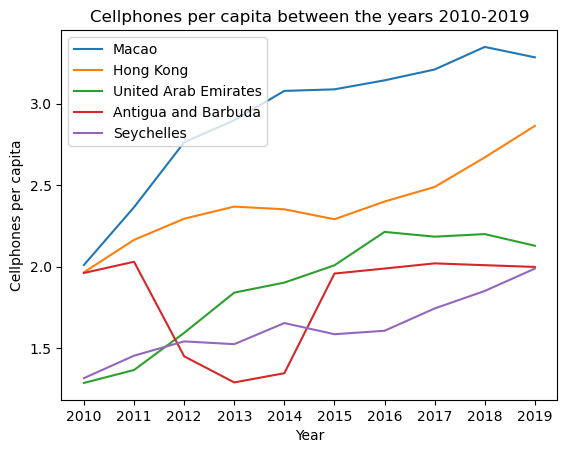

In [40]:
plt.plot(x_axis_years, y_axis, label=countrynames)
plt.xlabel('Year')
plt.ylabel('Cellphones per capita')
plt.title('Cellphones per capita between the years 2010-2019')
plt.legend()
plt.show()